# Imports and Setup

In [1]:
%load_ext autoreload
%autoreload 2
    
# Necessary/extra dependencies. 
import shutil

#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

# ClearML
import dotenv
dotenv.load_dotenv()
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
!echo $CLEARML_API_ACCESS_KEY
!echo $CLEARML_API_SECRET_KEY

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
FBVKMYRC1KTF3I0YX1TC
IIs3rRTC0t2kQS40o3kCJKU0iZYPTLKvC8hlQKEskR8KbZt0bt


Move `data.yaml` in the `yolov5/data` directory.

In [2]:
shutil.copy('./data.yaml', './yolov5/data')

'./yolov5/data/data.yaml'

# 2.Train

Train a YOLOv5s model on the custom dataset starting from pretrained `--weights yolov5s.pt`. Training results are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.

In [3]:
%cd yolov5

/home/default/rotalaser/yolov5


In [4]:
%ls

CITATION.cff     __pycache__/   export.py       requirements.txt  utils/
CONTRIBUTING.md  benchmarks.py  hubconf.py      runs/             val.py
LICENSE          classify/      main.py         segment/          yolov5s.pt
README.md        data/          models/         train.py
README.zh-CN.md  detect.py      pyproject.toml  tutorial.ipynb


In [5]:
from clearml import Task
task = Task.init(project_name='yolov5_v3', task_name='dataset')

ClearML Task: overwriting (reusing) task id=0a51d3bf63014440a15b947c79ebcbf8
2024-04-29 16:47:47,360 - clearml.Repository Detection - WARNING - Jupyter Notebook auto-logging failed, could not access: /home/default/rotalaser/yolov5/rotalaser/yolo5-v3_fla.ipynb
ClearML results page: https://app.clear.ml/projects/d6caf4b635544db7b78ff369d7217bff/experiments/0a51d3bf63014440a15b947c79ebcbf8/output/log
2024-04-29 16:47:47,487 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring
ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start
2024-04-29 16:57:01,890 - clearml.Task - WARNING - ### TASK STOPPED - USER ABORTED - STATUS CHANGED ###


In [8]:
!python3 train.py --img 320 --batch 8 --epochs 100 --data data/data.yaml --weights yolov5s.pt --cache

/root/.local/lib/python3.8/site-packages/torchvision-0.16.2+c6f3977-py3.8-linux-aarch64.egg/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: ''If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
train: weights=yolov5s.pt, cfg=, data=data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, en

In [57]:
task.close()

# 3. Inference

We use the best weights for the inference

In [9]:
%ls

CITATION.cff     __pycache__/   export.py       requirements.txt  utils/
CONTRIBUTING.md  benchmarks.py  hubconf.py      runs/             val.py
LICENSE          classify/      main.py         segment/          yolov5s.pt
README.md        data/          models/         train.py
README.zh-CN.md  detect.py      pyproject.toml  tutorial.ipynb


In [36]:
!python3 detect.py --weights runs/train/exp9/weights/best.pt --img 320 --source ../dataset/images/test --line-thickness 1 --save-txt

/root/.local/lib/python3.8/site-packages/torchvision-0.16.2+c6f3977-py3.8-linux-aarch64.egg/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: ''If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
detect: weights=['runs/train/exp9/weights/best.pt'], source=../dataset/images/test, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-306-gb599ae42 Python-3.8.10 torch-2.1.0a0+41361538.nv23.06 

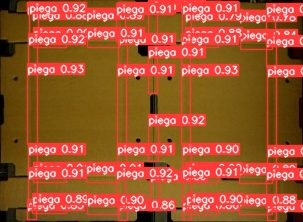

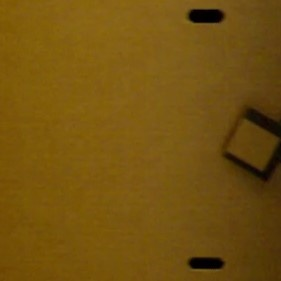

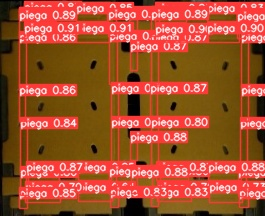

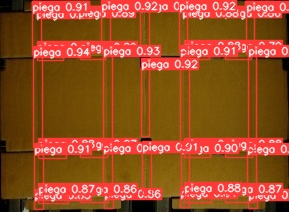

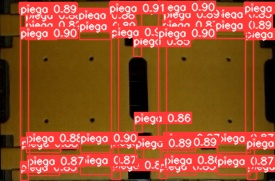

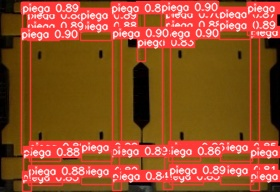

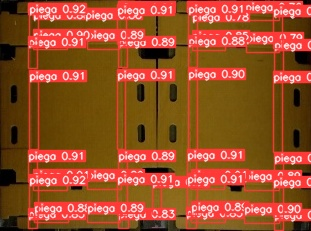

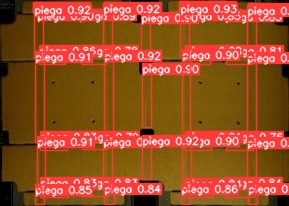

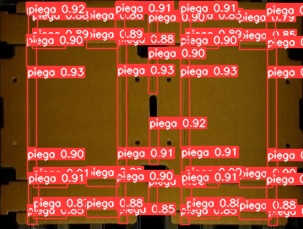

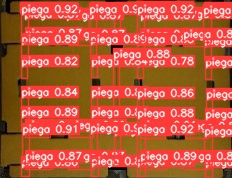

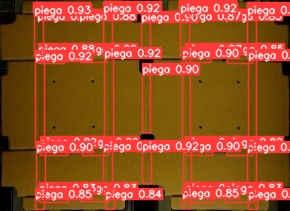

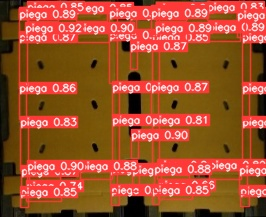

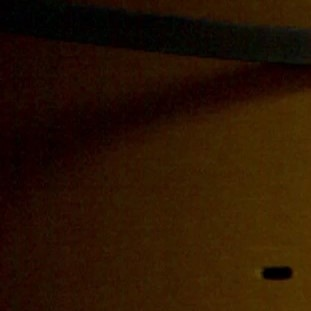

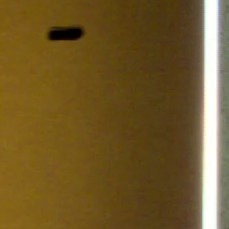

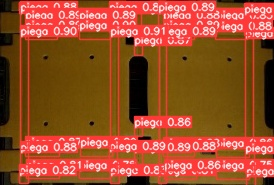

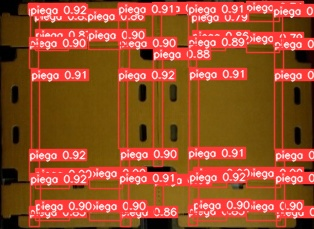

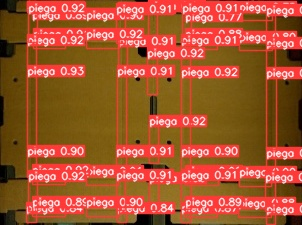

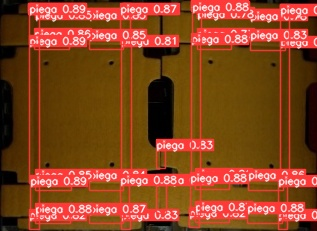

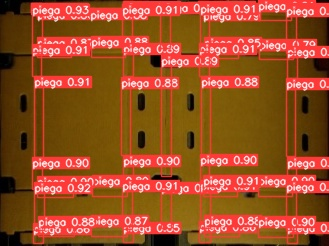

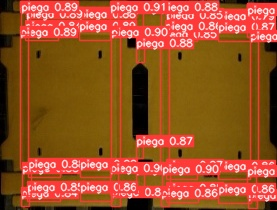

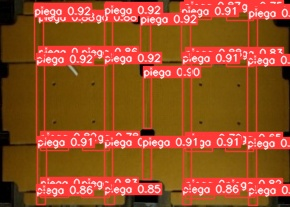

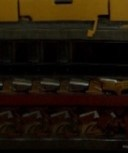

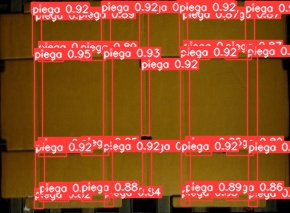

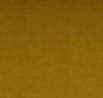

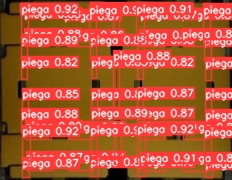

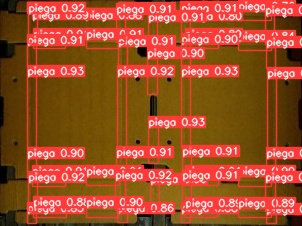

In [16]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp2/*.jpeg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")